In [177]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from scipy import interpolate
from operator import itemgetter
import matplotlib as mpl

plt.style.use('seaborn-white')
mpl.rcParams.update({'font.size': 16})

# Finding the Optimal Lowercut Value (TAME parameter) per Line
The lowercut value appears to be key to TAME assigning a good equivalent width measurement for a given line. This notebook uses measurements taken from ~20 stars at 10 different lowercut values to find the best lowercut value per line. Note that a lowercut value seems to be a SNR dependent parameter, so it might not be as simple as just finding a universal value per line.

In [157]:
# Take a look at one cluster

outputs = glob.glob("tame-1.1.0/col110*.json")
by_hand = glob.glob("tame-1.1.0/col110*.ew")


d = {'JSON File': outputs, 'By-Hand File': by_hand}
disp_df = pd.DataFrame(data=d)
disp_df

,By-Hand File,JSON File
0,tame-1.1.0/col110_1134red_oned_25jan14.ew,tame-1.1.0/col110_1134red_oned_25jan14.json
1,tame-1.1.0/col110_2119red_oned_26jan14.ew,tame-1.1.0/col110_2119red_oned_26jan14.json
2,tame-1.1.0/col110_2129red_oned_25jan14.ew,tame-1.1.0/col110_2129red_oned_25jan14.json
3,tame-1.1.0/col110_2223red_oned_26jan14.ew,tame-1.1.0/col110_2223red_oned_26jan14.json
4,tame-1.1.0/col110_3122red_oned_mar2014.ew,tame-1.1.0/col110_3122red_oned_mar2014.json
5,tame-1.1.0/col110_3144red_oned_mar2014.ew,tame-1.1.0/col110_3144red_oned_mar2014.json
6,tame-1.1.0/col110_3244red_oned_25jan14.ew,tame-1.1.0/col110_3244red_oned_25jan14.json
7,tame-1.1.0/col110_4260red_oned_26jan14.ew,tame-1.1.0/col110_4260red_oned_26jan14.json
8,tame-1.1.0/col110_5125red_oned_26jan14.ew,tame-1.1.0/col110_5125red_oned_26jan14.json


col110_1134red_oned_25jan14
Optimal Lowercut Value: 0.977299999999997
col110_2119red_oned_26jan14
Optimal Lowercut Value: 0.9635999999999985
col110_2129red_oned_25jan14
Optimal Lowercut Value: 0.9843999999999962
col110_2223red_oned_26jan14
Optimal Lowercut Value: 0.9699999999999978
col110_3122red_oned_mar2014
Optimal Lowercut Value: 0.9662999999999982
col110_3144red_oned_mar2014
Optimal Lowercut Value: 0.95
col110_3244red_oned_25jan14
Optimal Lowercut Value: 0.9868999999999959
col110_4260red_oned_26jan14
Optimal Lowercut Value: 0.95
col110_5125red_oned_26jan14
Optimal Lowercut Value: 0.9720999999999975


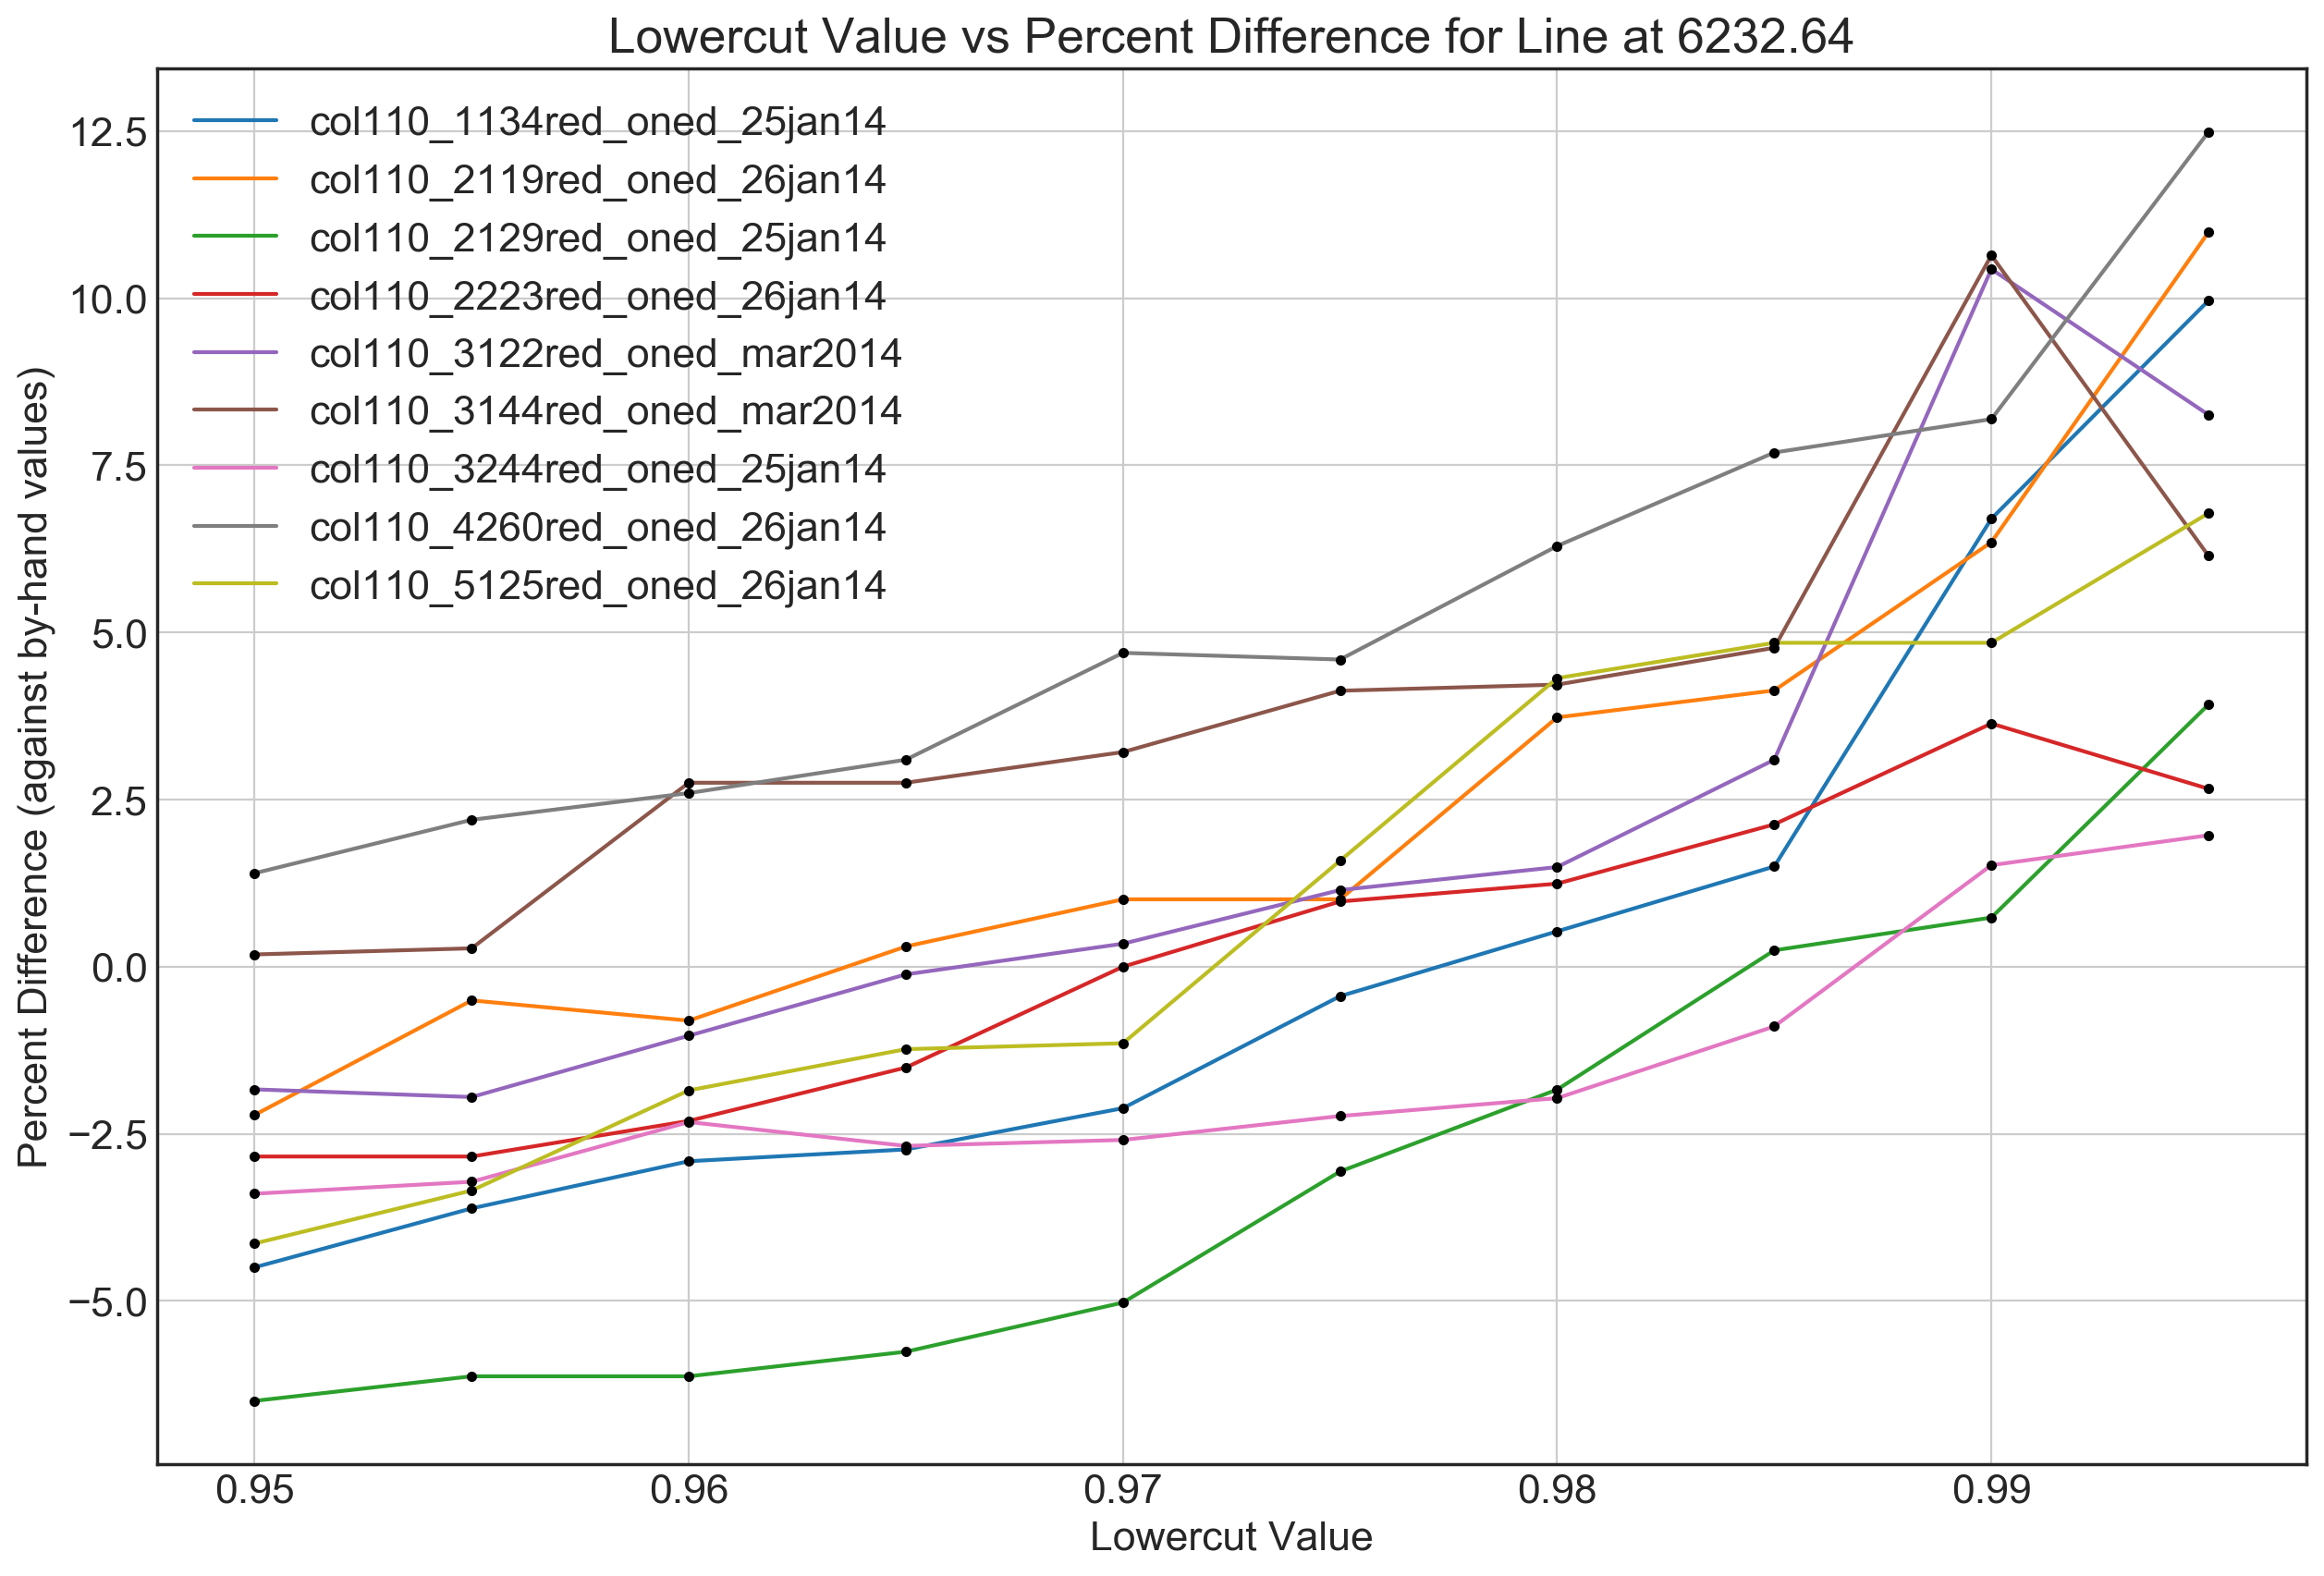

In [178]:
# Find optimal lowercut value

plt.figure(figsize=(15,10),dpi=200)
plt.title("Lowercut Value vs Percent Difference for Line at {}".format(key))
plt.xlabel("Lowercut Value")
plt.ylabel("Percent Difference (against by-hand values)")
plt.grid()

for i in range(len(outputs)):
    with open(outputs[i]) as jsonfile, open(by_hand[i]) as ewfile:
        jsondata = json.load(jsonfile)
        handdata = pd.read_csv(ewfile, delim_whitespace = True, header = None)[[0,4]]
        hand_dict = dict(zip([str(i) for i in handdata[0].tolist()], handdata[4].tolist()))
        key = list(jsondata.keys())[8]
        lowercut = [cut for cut,ew in jsondata[key]]
        ew_meas = [ew for cut,ew in jsondata[key]]
        ew_pdiff = ((np.array(ew_meas)-hand_dict[key])/hand_dict[key]) * 100
        
        f = interpolate.interp1d(lowercut, ew_pdiff,fill_value="extrapolate")
        lowercut_space = np.arange(0.95,0.995,0.0001)
        ew_pdiff_interp = f(lowercut_space)
        opt_idx = min(enumerate(abs(ew_pdiff_interp)), key=itemgetter(1))[0]
        opt_lowcut = lowercut_space[opt_idx]
        label = disp_df['JSON File'][i].split('/')[-1].split('.')[0]
        print(label)
        print("Optimal Lowercut Value: {}".format(opt_lowcut))
        
        
        plt.plot(lowercut_space, ew_pdiff_interp,'-',label = label)
        plt.plot(lowercut,ew_pdiff,'.',color='k')

    
plt.legend()